![](AnalizaRFM.png)

# 1. Wstęp

![](wstep.png)

Niniejszy projekt koncentruje się na przeprowadzeniu analizy danych. Użyta zostanie metoda RFM z pomocą, której gospodarstwa zostaną podzieleni na grupy.
   
**Wskaźnik RFM** (Recency, Frequency, Monetary) jest jednym z najbardziej popularnych narzędzi służącym do wartościowania klientów na podstawie ich wcześniejszych zakupów w branży detalicznej. Jest ono szczególnie wykorzystywane przez marketerów, którzy zajmują się marketingiem bezpośrednim. Dzięki niemu mogą określić wartość klienta. Analiza RFM ma swoje źródło w technikach z lat 60 i 70 ubieglego wieku. Analizę RFM warto stosować, ponieważ jest to względnie jedna z najłatwiejszych metod obliczenia wartości klienta, a pomimo tego pozwala usprawnić  przyszłe działania marketingowe. Analiza RFM jest więc jednym z łatwiejszych sposobów na segmentacje danych o klientach, szczególnie przydatnych w przypadku braku doświadczenia z takim zagadnieniem.


- **Recency** - jest wskaźnikiem obliczanym jako ilość czasu upłyniętego od ostatniego zakupu/interakcji,
- **Frequency** - jest wskaźnikiem obliczanym jako okres czasu od najwcześniejszego zakupu podzielony przez ilość zakupów (czasem obliczany jako całkowita liczba zakupów przez cały czas).
- **Monetary** - jest wskaźnikiem, który określa całkowitą wielkość wydanych pieniędzy przez klienta (lepszą zmienną jest średnia ilość pieniędzy wydanych na każde zamówienie).



# 2. Cel projektu

![](cele.png)
    
 - Głównym celem projektu jest przeprowadzenie analizy RFM.
   
 - Celem szczegółowym jest wykonanie analizy zbioru, grupowania transakcji i wyciąganie na ich podstawie wniosków, potrzebnych do powiększenia zysku ze sprzedaży danej firmy. 

# 3.  Założenia dotyczące projektu

![](strategia.png)


- wykorzystane zostaną dane z książki: "*Data analysis Using SQL and Exel*" autorstwa Gordona S. Linoff-a
- stworzenie funkcji do przeprowadzenia analizy RFM dla dowolnego zakresu danych
- progi dla wartości są automatyczne generowane na podstawie kwantyli 0.2,0.4,0.6,0.8 w danym zakresie danych 
- zostaną obliczone następujące wskaźniki:           
    - **Recency (R)** - liczba dni od ostatniego zakupu,       
    - **Frequency (F)** - liczba dni od najwcześniejszego zakupu podzielony przez ilość zakupów,
    - **Monetary (M)** - średnia ilość pieniędzy wydanych przez gospodarstwa.  
- stworzenie szczegółowej tabeli dla wartości R, F i M oraz podzielić otrzymane dane na równe zakresy poprzez zastosowanie kwantyli. 
- ocenienie gospodarstw pod względem R,F i M w skali od 1 do 5, gdzie:    
    - **dla R i F** wartość 1 jest najlepszym wynikiem (oczekiwanym), a wartość 5 jest najgorszym wynikiem
    - **Dla M** wartość 5 jest najlepszym wynikiem(oczekiwanym), a wartość 1 jest najgorszym wynikiem  
- ocena wartości RF dla gospodarstw oraz nadanie rodzaju klienta
- stworzenie macierzy RF z przypisanymi rodzajami klientów
- stworzenie list dla każdej grupy klientów w celu szybkiego policzenia liczby takich klientów
- sprawdzić jakie towary są  najczęściej brane przez daną grupę klientów (np. najlepsi klienci)
- jako datę graniczną (*cutoff date*) przyjmiemy 01 stycznia 2016 (zamówienia po tej dacie będą ignorowane)
- porównanie R,F i M dla lat 2014-2016
- analiza gospodarstw domowych pod względem kategorii klientów uwzględniając poszczególne lata, migracje klientów 
   
  

# 4. Wzory dla obliczeń matematycznych

## A. Obliczenie kwantyli   
    
**Wzór dla pierwszego kwantyla:**

## $Q_{1} = x_{0m} + \frac{\frac{n}{5} - \sum_{i-1}^{m-1}n_{i}}{n_{m}} * h$        




**Wzór dla drugiego kwantyla**

## $Q_{2} = x_{0m} + \frac{\frac{2n}{5} - \sum_{i-1}^{m-1}n_{i}}{n_{m}} * h$

**Wzór dla trzeciego kwantyla:**

## $Q_{3} = x_{0m} + \frac{\frac{3n}{5} - \sum_{i-1}^{m-1}n_{i}}{n_{m}} * h$

**Wzór dla czwartego kwantyla:**

## $Q_{4} = x_{0m} + \frac{\frac{4n}{5} - \sum_{i-1}^{m-1}n_{i}}{n_{m}} * h$


    
## A.1. **Legenda:**     

## $x_{0m}  - dolna \qquad granica \qquad  mediany$

## $n_{m}- liczebność \qquad klasy \qquad mediany$ 

## $h  -  interwał, \qquad czyli \qquad rozpiętość \qquad klasy$
## $\sum_{i-1}^{m-1}n_{i}$
- liczebność  skumulowana  do klasy  poprzedzającej klasę  kwartyla poprzedniego

# 5.  Wczytanie niezbędnych bibliotek, odczyt danych oraz stworzenie wymaganych funkcji

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import re

In [2]:
granice_kwantyli = [0.2,0.4,0.6,0.8]
rzad_kwantyli = np.round(np.arange(0, 1.05, 0.05), 2)

In [3]:
def kwantyle_wykres(kwantyle):
    fig= plt.figure()
    punkty_x = []
    punkty_y = []
    for k in granice_kwantyli:
        punkty_x.append(kwantyle[k])
        punkty_y.append(k)
    plt.plot(kwantyle.values,kwantyle.index)
    plt.plot(punkty_x, punkty_y, "ro", marker="o")
    plt.grid(b = True)
    for i in range(0, len(punkty_x)):
        plt.text(punkty_x[i], punkty_y[i]-0.05, "{}".format(int(punkty_x[i])))


In [4]:
def kwantyle_wykres_ax(kwantyle,ax,title=None):

    punkty_x = []
    punkty_y = []
    for k in granice_kwantyli:
        punkty_x.append(kwantyle[k])
        punkty_y.append(k)
    ax.plot(kwantyle.values,kwantyle.index)
    ax.plot(punkty_x, punkty_y, "ro", marker="o")
    ax.grid(b = True)
    if title is not None:
        ax.title.set_text(title)
    for i in range(0, len(punkty_x)):
        ax.text(punkty_x[i], punkty_y[i]-0.05, "{}".format(int(punkty_x[i])))

In [5]:
def ustaw_poziomy(dane,nazwa_kolumny,kwantyle): 
    dane['wartosc'] = 1
    next_value = 2
    for k in granice_kwantyli:
        dane.loc[dane[nazwa_kolumny] >= kwantyle[k], 'wartosc'] = next_value
        next_value += 1

In [6]:
campaign = pd.read_csv("dane/campaign.txt", sep="\t", encoding="latin1")
campaign.head()

,campaignid,campaignname,channel,discount,freeshippingflag
0,2001,NaN,PARTNER,0,N
1,2002,NaN,AD,0,N
2,2003,NaN,PARTNER,0,N
3,2004,NaN,PARTNER,0,N
4,2005,NaN,PARTNER,0,N


In [7]:
calendar = pd.read_csv("dane/calendar.txt", sep="\t", encoding="latin1")
calendar.head()

,DATE,ISO,datenum,DOW,dowint,Year,Month,dom,monthstr,doy,...,numholidays,holidayname,holidaytype,national,minor,christian,jewish,muslim,chinese,other
0,1950-01-01 00:00:00,1950-01-01,18264,Sun,1,1950,1,1,Jan,1,...,1,New Year's Day,national,New Year's Day,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-02 00:00:00,1950-01-02,18265,Mon,2,1950,1,2,Jan,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-03 00:00:00,1950-01-03,18266,Tue,3,1950,1,3,Jan,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-04 00:00:00,1950-01-04,18267,Wed,4,1950,1,4,Jan,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-05 00:00:00,1950-01-05,18268,Thu,5,1950,1,5,Jan,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
customer = pd.read_csv("dane/customer.txt", sep="\t", encoding="latin1")
customer.head()

,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [9]:
orderline = pd.read_csv("dane/orderline.txt", sep="\t", encoding="latin1")
orderline.head()

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,1010561,1006414,10834,2011-03-07 00:00:00,2011-03-08 00:00:00,18.00,1,18.00
1,1010562,1006541,11052,2011-01-19 00:00:00,2011-01-20 00:00:00,10.00,2,20.00
2,1010563,1006542,11070,2011-01-19 00:00:00,2011-01-20 00:00:00,19.12,1,19.12
3,1010564,1010154,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
4,1010565,1009110,11048,2009-11-11 00:00:00,2009-11-12 00:00:00,10.00,2,20.00


In [10]:
orders = pd.read_csv("dane/orders.txt", sep="\t", encoding="latin1")
orders["orderdate"] = pd.to_datetime(orders["orderdate"])
orders.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,1002854,45978,2141,2009-10-13,NEWTON,MA,02459,VI,190.00,3,3
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1


In [11]:
product = pd.read_csv("dane/product.txt", sep="\t", encoding="latin1")
product.head()

,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [12]:
zipcensus = pd.read_csv("dane/zipcensus.txt", sep="\t", encoding="latin1")
zipcensus.head()

,zipcode,state,population,housingunits,landareameters,waterareameters,landareamiles,waterareamiles,latitude,longitude,...,hhuofuelnone,hhuoplumbingcomplete,hhuoplumbinglacking,hhumediancashrent,hhunmarried,hhunmarriedmm,hhunmarriedmf,hhunmarriedff,hhunmarriedfm,hhother
0,601,PR,19143,6715,172731389,1082233,66.691965,0.417853,18.180103,-66.749472,...,0.622561,0.948771,0.051229,214,0.024936,0.001866,0.010178,0.009839,0.003053,0.978456
1,602,PR,42042,15590,80137374,0,30.941214,0.000000,18.363285,-67.180247,...,0.637648,0.880757,0.119243,233,0.020562,0.003994,0.008506,0.006583,0.001479,0.980104
2,603,PR,55530,21626,78693011,83181,30.383543,0.032116,18.448619,-67.134224,...,0.666979,0.938016,0.061984,154,0.020384,0.001720,0.004744,0.012772,0.001147,0.978104
3,604,PR,3923,1245,7785336,0,3.005935,0.000000,18.498987,-67.136995,...,0.614325,0.996622,0.003378,396,0.040404,0.008264,0.010101,0.000000,0.022039,0.961433
4,606,PR,6449,2272,94870047,0,36.629531,0.000000,18.182151,-66.958807,...,0.621957,0.938820,0.061180,202,0.018381,0.003974,0.008942,0.005464,0.000000,0.982613


In [13]:
zipcounty = pd.read_csv("dane/zipcounty.txt", sep="\t", encoding="latin1")
zipcounty.head()

,zipcode,latitude,longitude,poname,zipclass,countyfips,state,countyname,countypop,countyhu,countylandareamiles,countywaterareamiles
0,773,18.366028,-65.708138,LUQUILLO,,72089,PR,Luquillo Municipio,19817,9327,25.697733,20.725328
1,775,18.323736,-65.296471,CULEBRA,P,72049,PR,Culebra Municipio,1868,1024,11.618370,157.207930
2,777,18.206490,-65.901772,JUNCOS,,72077,PR,Juncos Municipio,36452,13064,26.586044,0.012102
3,778,18.259092,-65.974640,GURABO,,72063,PR,Gurabo Municipio,36743,12854,27.841166,0.437728
4,780,18.001995,-66.607430,COTO LAUREL,,72113,PR,Ponce Municipio,186475,66471,114.721200,78.884560


## 6. Wyznaczenie Recency
 > czyli określenie daty ostatniego zakupu.

### 6.1 Sprawdzenie kiedy ostatnio zrobiono zamówienie przez gospodarstwo domowe  

In [14]:
polaczone = pd.merge(customer, orders, on="customerid")
polaczone = polaczone[polaczone['orderdate'] <= "2016-01-01"]
x = polaczone.groupby(["householdid"])['orderdate'].max().to_frame()

In [15]:
x.head()

,orderdate
householdid,
18111489,2011-08-28
18111580,2014-11-10
18111642,2014-10-21
18111668,2014-02-03
18111771,2011-01-15


### 6.2 Obliczenie liczby dni od daty ostatniego zakupu do daty granicznej oraz obliczenie wartości dla recency 

Do wyznaczenia liczby dni obliczono różnicę pomiędzy datą graniczną a datą ostatniego zamówienia gospodarstwa domowego. Następnie wyznaczono granicę poziomów wartości dla recency za pomocą kwantyli. 

In [16]:
d0 =  np.datetime64('2016-01-01')
liczba_dni = (d0 - x.orderdate)
x['recency'] = liczba_dni.dt.days
kwantyle = x['recency'].quantile(rzad_kwantyli)
ustaw_poziomy(x,'recency',kwantyle)

In [17]:
x.head()

,orderdate,recency,wartosc
householdid,,,
18111489,2011-08-28,1587,4
18111580,2014-11-10,417,2
18111642,2014-10-21,437,2
18111668,2014-02-03,697,3
18111771,2011-01-15,1812,5


**Tabela 1.** Przedstawienie gospodarstw pod względem wartości

### 6.3 Wyświetlenie wykresu recency

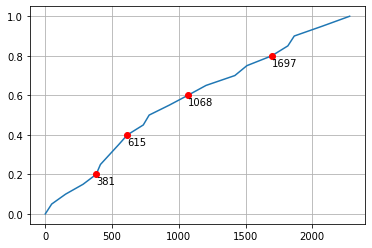

In [18]:
kwantyle_wykres(kwantyle)

**Rys. 1** Wykres Recency

### 6.4. Wnioski 

Aby dokładnie określić wartość Recency należało najpierw:
- sprawdzić datę ostatniego zakupu przeprowadzonego przez dane gospodarstwo,
- obliczyć liczbę dni od ostatniego zakupu przez gospodarstwo

Na podstawie tych danych zostały utworzone wartości za pomocą kwantyli dla poszczególnych gospodarstw. Takie zastosowanie kwantyli dzieli nasze wartości po równo. Wzory do obliczenia kwantyli zostały przedstawione w podpunkcie **4**. 


W punkcie **6.3** został wyświetlony wykres Recency na podstawie obliczonych danych. Oś horyzontalna przedstawia liczbę dni od ostatniego zakupu a oś wertykalna zastosowanych wartości kwantyli. 

Z wykresu można odczytać że:
- 20% gospodarstw dokonało zakupu w ciągu 381 dni
- 40% gospodarstw dokonało zakupu w ciągu 615 dni
- 60% gospodarstw dokonało zakupu w ciągu  1068 dni
- 80% gospodarstw dokonało zakupu w ciągu  1697 dni

Najważniejsze gospodarstwa znajdują się w tej grupie, którzy dokonali zakupu w ciągu 381 dni. Dostały one wartość klasyfikacji równą 1, czyli największą.      

**Oceny rozkładają się następująco:**
- 1 do	381 dni
- 2 do	615 dni
- 3 do	1068 dni
- 4 do 	1697 dni
- 5 powyżej 1697 dni

## 7. Wyznaczenie Frequency
> jako wskaźnik okresu czasu od najwcześniejszego zakupu podzielony przez ilość zakupów.

### 7.1  Obliczenie liczby zamówień i  obliczenie ilości dni od pierwszej transakcji 

Do wyznaczenia liczby dni obliczono różnicę pomiędzy datą graniczną a datą pierwszej transakcji. W zbiorze danych zostały podliczone wszystkie zamówienia względem gospodarstwa domowego. 

In [19]:
polaczone_frequency = pd.merge(customer, orders, on="customerid")
polaczone_frequency['orderdate'] = pd.to_datetime(polaczone_frequency['orderdate'])
polaczone_frequency = polaczone_frequency[polaczone_frequency['orderdate'] <= "2016-01-01"]
minimalna_data = polaczone_frequency.groupby(["householdid"])['orderdate'].min().to_frame()
liczba_zamowien = polaczone_frequency.groupby(["householdid"])['orderdate'].count().to_frame()
liczba_zamowien.columns= ["liczba_zamowien"]
d0 =  np.datetime64('2016-01-01')
liczba_dni = (d0 - minimalna_data.orderdate)
liczba_zamowien['liczba_dni_od_pierwszego_zakupu'] = liczba_dni.dt.days

In [20]:
liczba_zamowien.head()

,liczba_zamowien,liczba_dni_od_pierwszego_zakupu
householdid,,
18111489,1,1587
18111580,1,417
18111642,1,437
18111668,1,697
18111771,1,1812


### 7.2 Wyznaczanie Frequency oraz obliczenie wartości
Frequency zostało obliczone poprzez obliczenie ilorazu dla danego gospodarstwa:   
# $\frac{Liczba\quad dni \quad od\quad  ostatniego \quad zakupu}{\sum zamowienia}$
Następnie wyznaczono granicę poziomów wartości dla recency za pomocą kwantyli.

In [21]:
liczba_zamowien["Frequency"] = liczba_zamowien['liczba_dni_od_pierwszego_zakupu']/liczba_zamowien['liczba_zamowien']
frequency_kwantyle = liczba_zamowien['Frequency'].quantile(rzad_kwantyli)
ustaw_poziomy(liczba_zamowien,'Frequency',frequency_kwantyle)

In [22]:
liczba_zamowien.head()

,liczba_zamowien,liczba_dni_od_pierwszego_zakupu,Frequency,wartosc
householdid,,,,
18111489,1,1587,1587.0,4
18111580,1,417,417.0,2
18111642,1,437,437.0,2
18111668,1,697,697.0,3
18111771,1,1812,1812.0,5


**Tabela 2.** Wartości niezbędne do wyliczenia frequency, wskaźnik frequency oraz wartość

### 7.3. Wyświetlenie wykresu Frequency

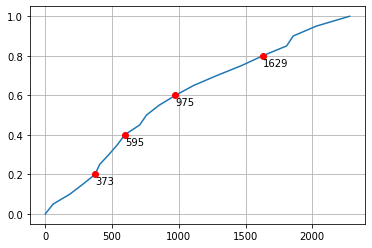

In [23]:
kwantyle_wykres(frequency_kwantyle)

**Rys. 2** Wykres Frequency

### 7.4 Wnioski 

Aby dokładnie określić wartość Frequency należało najpierw:
- określić kiedy zostało zrobione pierwsze zrealizowane zamówienie,
- obliczyć liczbę zamówień dla gospodarstwa domowego

Na podstawie tych danych zostały utworzone wartości za pomocą kwantyli dla danego gospodarstwa. 

Znając wartości został utworzony wykres przedstawiony na **Rys. 2.**
Na powyższym wykresie można zauważyć: 
- 20% gospodarstw zamawia minimalnie raz w ciągu 373 dni
- 40% gospodarstw zamawia minimalnie w ciągu 595 dni
- 60% gospodarstw zamawia minimalnie w ciągu  975 dni
- 80% gospodarstw zamawia minimalnie w ciągu  1629 dni

Najważniejsze gospodarstwa znajdują się w grupie, gdzie został zamówiony jakiś produkt przynajmniej raz w ciągu najbliższych 373 dni. Takim gospodarstwom została przypisana wartość klasyfikacji równa 1, czyli największa. Wiemy już dzięki temu, że najlepsi konsumenci to tacy, którzy kupują często, a także w krótkim odstępie czasowym. Kolejnym krokiem prowadzącym do pełnej analizy brakuje nam informacji na temat ilości wydanych pieniędzy.  Dlatego przejdziemy teraz do kolejnego czynnika, czyli Monetary. 

**Oceny rozkładają się następująco:**
- 1 do	373 dni
- 2 do	595 dni
- 3 do	975 dni
- 4 do 	1629 dni
- 5 powyżej 1629 dni

# 8. Monetary
> średnia wielkość pieniędzy wydanych przez klienta.

### 8.1. Wyliczanie średniej ilości pieniędzy wydawanej na zakupy oraz przypisanie wartości

Została obliczona średnia arytmetyczna wydanych pieniędzy przez gospodarstwo domowe.


# $\overline{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}$
Następnie wyznaczono granicę poziomów wartości dla recency za pomocą kwantyli.

In [24]:
polaczone_monetary = pd.merge(customer, orders, on="customerid")
polaczone_monetary = polaczone_monetary[polaczone_monetary['orderdate'] <= "2016-01-01"]
kwota = polaczone_monetary.groupby(["householdid"])['totalprice'].mean().to_frame()
kwota.columns= ["srednia kwota"]
monetary_kwantyle = kwota['srednia kwota'].quantile(rzad_kwantyli)
ustaw_poziomy(kwota,'srednia kwota',monetary_kwantyle)

In [25]:

kwota.sort_values("srednia kwota", ascending=False).head()

,srednia kwota,wartosc
householdid,,
18442778,9848.96,5
51035891,8830.00,5
36213508,6920.00,5
48765412,6625.00,5
36208040,6568.62,5


**Tabela 3.** Największa średnia kwota dla Monetary

### 8.2. Wyświetlanie wykresu Monetary

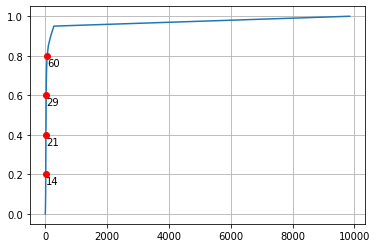

In [26]:
kwantyle_wykres(monetary_kwantyle)

**Rys. 3**  Wykres Monetary

### 8.3. Wnioski 

Aby dokładnie określić wartość Monetary należało najpierw:
- wyliczyć średnią ilość wydawanych pieniędzy podczas zakupów przez konkretne gospodarstwo domowe,
- następnie przypisać wartości. 

Zarówno jak w poprzednich przypadkach na podstawie tych danych zostały utworzone wartości za pomocą kwantyli dla danego gospodarstwa. 

Znając wartości został utworzony wykres przedstawiony na **Rys. 3.** 
Na podstawie wykresu można zauważyć, że: 
- 20% gospodarstw wydaje średnio na zakupy 14 dolarów 
- 40% gospodarstw wydaje średnio na zakupy 21 dolarów
- 60% gospodarstw wydaje średnio na zakupy 29 dolarów
- 80% gospodarstw wydaje średnio na zakupy 60 dolarów

Najważniejsze gospodarstwa znajdują się tym razem w tej części gdzie wydają średnio więcej niż 60 dolarów na zakupy. Dostały one wartość klasyfikacji równą 5 - czyli największą i jest to odwrotna sytuacja niż w przypadku Recency oraz Frequency (tam 5 było wartością najgorszą).    



Podsumowując najlepszymi gospodarstwi dla nas są te, w których osoby kupują często, a także w krótkim odstępie czasowym i wydają na takie zakupy powyżej 60 $. Możemy nadal brać pod uwagę kilka zmiennych które pomogą nam lepiej opisać gospodarstwa i klientów, oraz umożliwią danej firmie zwiększenie sprzedaży, a co za tym idzie i zysków.

# 9. Tabela podsumowująca wartości RFM

In [27]:
index = granice_kwantyli 
recency = []
frequency = []
monetary = []
for i in index:
    recency.append(kwantyle[i])
    frequency.append(frequency_kwantyle[i])
    monetary.append(np.round(monetary_kwantyle[i],2))
    
recency_series = pd.Series(recency, index=index)
frequency_series = pd.Series(frequency, index=index)
monetary_series = pd.Series(monetary, index=index)

frame = {
    'Recency': recency_series,
    'Frequency': frequency_series,
    'Monetary': monetary_series
    
}


In [28]:
pd.DataFrame(frame)

,Recency,Frequency,Monetary
0.2,381.0,373.0,14.95
0.4,615.0,595.0,21.00
0.6,1068.0,975.0,29.95
0.8,1697.0,1629.0,60.58


**Tabela 4.** Przedstawienie wartości RFM względem breakpointów 

 **Uwagi:** Wynik monetary został zaokrąglony do dwóch miejs po przecinku. 

# 10. RFM Score 

Zostało wyznaczone RFM Score, które polega na dołączeniu wartości poszczególnych wskaźników. W przypadku, gdy:
- R = 1, 
- F = 2, 
- M = 3,    
to otrzymujemy RFM Score równy 123.    

Oczekiwanym wynikiem dla tej wartości jest **115**. Najgorszy wynik w RFM Score wynosi: **551**. 

In [29]:
analiza_RFM = pd.merge(liczba_zamowien, kwota, on="householdid")
analiza_RFM = pd.merge(analiza_RFM, x, on="householdid")
analiza_RFM = analiza_RFM[['recency', 'wartosc','Frequency', 'wartosc_x', 'srednia kwota', 'wartosc_y']] 
analiza_RFM.columns= ["Recency","Wartość Recency","Frequency", "Wartość Frequency", "Monetary", "Wartość Monetary"]
analiza_RFM["RFM Score"] = analiza_RFM["Wartość Recency"]*100 + analiza_RFM["Wartość Frequency"]*10 + analiza_RFM["Wartość Monetary"]

analiza_RFM.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score
householdid,,,,,,,
18111489,1587,4,1587.0,4,10.95,1,441
18111580,417,2,417.0,2,99.95,5,225
18111642,437,2,437.0,2,0.00,1,221
18111668,697,3,697.0,3,10.75,1,331
18111771,1812,5,1812.0,5,15.25,2,552


**Tabela 5.** Przedstawienie wartości dla R, F i M oraz RFM Score 

In [30]:
wykres_bubbles_count = analiza_RFM.groupby("RFM Score").count()
wykres_bubbles_count = wykres_bubbles_count.reset_index().drop(columns=["Wartość Recency", "Frequency", "Wartość Frequency", "Monetary", "Wartość Monetary"])
wykres_bubbles_count.columns = ["RFM Score", "count"]
wykres_bubbles_count["R"] = wykres_bubbles_count["RFM Score"].astype(str).str[0].astype(int)
wykres_bubbles_count["FM"] = wykres_bubbles_count["RFM Score"].astype(str).str[1:].astype(int)

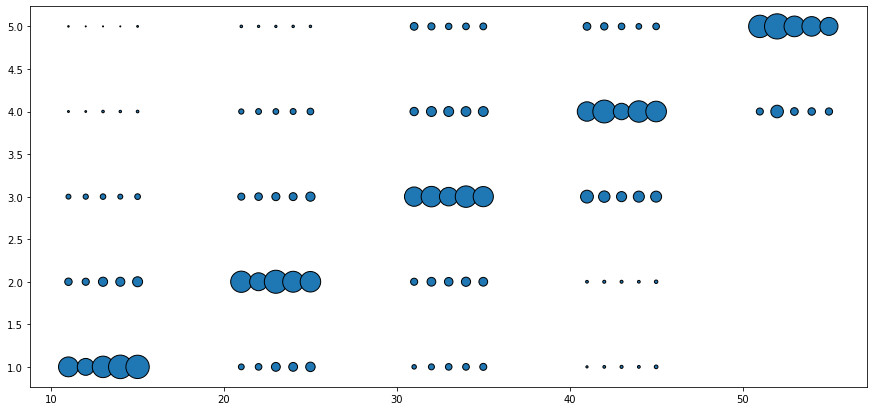

In [31]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(
    wykres_bubbles_count["FM"], 
    wykres_bubbles_count["R"] ,
    s=np.power(wykres_bubbles_count["count"], 1/1.4),
    edgecolors="0"
)

**Rys.4** Wykres bąbelkowy 2D pokazujący korelację pomiędzy Recency a Frequency-Monetary

Wykres pokazuje komórki RFM dla osi wertykalnej jest Recency, a dla horyzontalnej frequency i monetary. Duże bąbelki pokazują największą korelację pomiędzy wartościami, a także pokazują ilość gospodarstw.


# 11. Wyznaczanie punktacji dla kientów

W celu unifikacji danych dla RFM zostanie w tym momencie zamieniona skala dla wskaźnika Monetary. Wartość 1 jest najlepszą, zaś 5 jest wartością niepożądaną. Umożliwi to określenie liczby klientów (gospodarstw domowych) pod względem zadanej punktacji.               




**Wskaźnik Score**, czyli punktacji klientów wyznaczany jest na podstawie zsumowanych wartośći R,F i M. 

In [32]:
punktacja_rmf = analiza_RFM.copy()
punktacja_rmf["Wartość Monetary"] = 6 - punktacja_rmf["Wartość Monetary"]
punktacja_rmf["Score"] = punktacja_rmf["Wartość Monetary"] + punktacja_rmf["Wartość Frequency"] + punktacja_rmf["Wartość Recency"]
punktacja_rmf.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Score
householdid,,,,,,,,
18111489,1587,4,1587.0,4,10.95,5,441,13
18111580,417,2,417.0,2,99.95,1,225,5
18111642,437,2,437.0,2,0.00,5,221,9
18111668,697,3,697.0,3,10.75,5,331,11
18111771,1812,5,1812.0,5,15.25,4,552,14


**Tabela 6.** Punktacja dla gospodarstw 

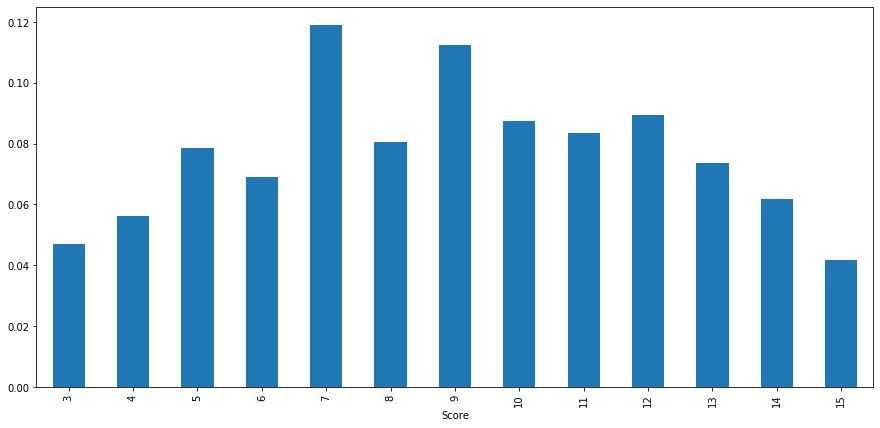

In [33]:
punktacja_rmf_ilosc= punktacja_rmf.groupby(["Score"])["Recency"].count()
punktacja_rmf_ilosc = punktacja_rmf_ilosc/punktacja_rmf_ilosc.sum()
fig = plt.figure(figsize=(15, 7))
punktacja_rmf_ilosc.plot.bar()

**Rys. 5** Wykres ilości zakwalifikowanych klientów według punktacji

Wykres pozwala nam zauważyć, że odsetek klientów graniczny (wartości 3 i 15) jest podobny. Oznacza to, że oceny najbardziej pozytywne i najbardziej negatywne zostały uzyskane przez podobną liczbę klientów. Następne wartości na wykresie nie pozwalają nam na ocenienie dokładnych przyznanych ocen, ponieważ dla wartości 4 w Score, możliwe są kombinacje: 112, 121, 211. Najwyższe wartości to 7 i 9. 

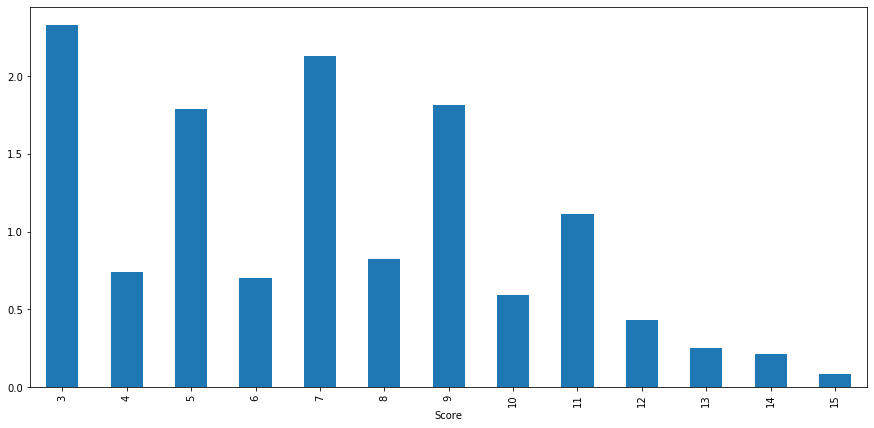

In [34]:
punktacja_rmf_ilosc= punktacja_rmf.groupby(["Score"])["Monetary"].sum()
punktacja_rmf_ilosc = punktacja_rmf_ilosc/punktacja_rmf_ilosc.mean()
fig = plt.figure(figsize=(15, 7))
punktacja_rmf_ilosc.plot.bar()

**Rys. 6** Procentowy udział średniej wartości monetary w całości

Wykres ten przedstawia uzupełnienie **Rys. 5** i pozwala określić, że największy zysk przynoszą klienci, którzy uzyskali najlepsze oceny. 

# 12. Analiza RFM

### 12.1 Macierz FM 

Wyznaczono grupy odbiorców ze względu na wskaźniki F i M ze wzgldu na uławienie klasyfikacji. 

In [35]:
rodzaj_klienta_mapa = {
    r'[4-5][4-5]': 'klienci w hibernacji',
    r'[4-5][2-3]': 'klienci zagrożeni',
    r'[4-5]1': 'klienci nie do stracenia',
    r'3[4-5]': 'uśpieni klienci',
    r'33': 'wymagajacy uwagi',
    r'[2-3][1-2]': 'lojalni',
    r'25': 'potencjalnie obiecujący',
    r'15': 'nowi klienci',
    r'[1-2][3-4]': 'potencjalni najlepsi',
    r'1[1-2]': 'najlepsi klienci',
}

analiza_RFM['Rodzaj klienta [FM]'] = analiza_RFM['Wartość Recency'].map(str) + analiza_RFM['Wartość Frequency'].map(str)
analiza_RFM['Rodzaj klienta [FM]'] = analiza_RFM['Rodzaj klienta [FM]'].replace(rodzaj_klienta_mapa, regex=True)
analiza_RFM.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
18111489,1587,4,1587.0,4,10.95,1,441,klienci w hibernacji
18111580,417,2,417.0,2,99.95,5,225,lojalni
18111642,437,2,437.0,2,0.00,1,221,lojalni
18111668,697,3,697.0,3,10.75,1,331,wymagajacy uwagi
18111771,1812,5,1812.0,5,15.25,2,552,klienci w hibernacji


**Tabela 7.** Zaklasyfikowanie gospodarstw ze względu na rodzaj klienta 

Text(3.3, 4, 'klienci w hibernacji')

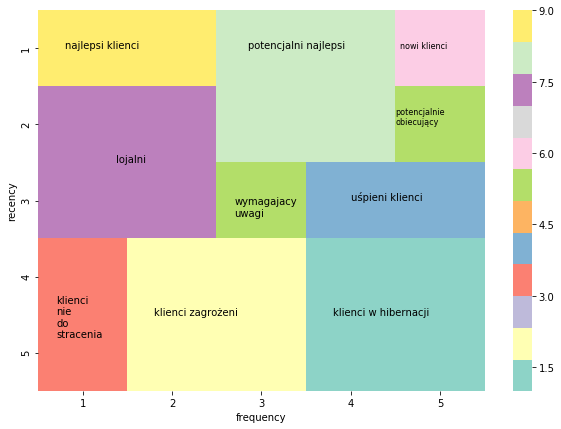

In [36]:
recency = []
frequency = []
values = []
rodzaj_klienta_mapa_numer = {
    r'[4-5][4-5]': 1,
    r'[4-5][2-3]': 2,
    r'[4-5]1': 3,
    r'3[4-5]': 4,
    r'33': 5,
    r'25': 5,
    r'15': 6,
    r'[2-3][1-2]': 7,
    r'[1-2][3-4]': 8,
    r'1[1-2]': 9,
}
for r in range(min(analiza_RFM["Wartość Frequency"]),max(analiza_RFM["Wartość Frequency"])+1):
    for f in range(min(analiza_RFM["Wartość Recency"]),max(analiza_RFM["Wartość Recency"])+1):
        recency.append(r)
        frequency.append(f)
        val_str = "{}{}".format(r,f)
        for k in rodzaj_klienta_mapa_numer:
            if re.compile(k).match(val_str):
                values.append(rodzaj_klienta_mapa_numer[k])
                break

table = pd.DataFrame({
    "recency": recency,
    "frequency": frequency,
    "values": values
}
)
macierz = table.pivot("recency","frequency","values")
fig, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(macierz,ax=ax,cmap="Set3")
ax.text(0.3,0.5, rodzaj_klienta_mapa[r'1[1-2]'], fontsize=10)
ax.text(1.3,4, rodzaj_klienta_mapa[r'[4-5][2-3]'], fontsize=10)
ax.text(0.2,4.3,rodzaj_klienta_mapa[r'[4-5]1'].replace(' ',"\n"), fontsize=10)
ax.text(3.5,2.5, rodzaj_klienta_mapa[r'3[4-5]'], fontsize=10)
ax.text(2.2,2.7, rodzaj_klienta_mapa[r'33'].replace(' ',"\n"), fontsize=10)
ax.text(4,1.5, rodzaj_klienta_mapa[r'25'].replace(' ',"\n"), fontsize=8)
ax.text(4.05,0.5, rodzaj_klienta_mapa[r'15'], fontsize=8)
ax.text(0.87,2, rodzaj_klienta_mapa[r'[2-3][1-2]'], fontsize=10)
ax.text(2.35,0.5, rodzaj_klienta_mapa[r'[1-2][3-4]'], fontsize=10)
ax.text(3.3,4, rodzaj_klienta_mapa[r'[4-5][4-5]'], fontsize=10)

**Rys. 7** Macierz przedstawiająca rodzaje klientów względem wskaźników Frequency i Recency. 

Według macierzy podzielono klientów na następujące rodzaje: 
- **najlepsi** - kupują najczęściej, kupują w małym odstępie czasu, wydają najwięcej
- **lojalni** -	kupują regularnie i często
- **potencjalnie obiecujący** - nowi klienci ze średnią częstotliwością.
- **nowi** - Kupił coś ostatnio, ale nie często.
- **potencjalnie obiecujący** - Ostatni kupili, ale kupują rzadko
- **wymagający uwagi** - grupa, która znajuduje się w wartościach dla R i F: 3, 3. 
- **uśpieni** - dawno kupi i nieczęsto 
- **zagrożoni** - 	kupowali często, ale dawno temu.
- **nie do stracenia** - często kupowali, ale nie dokonali zakupu od dłuższego czasu
- **w hibernacji** - najgorszy wariant, kupowali bardzo dawno i bardzo rzadko


### 12.2. Wyznaczenie listy najlepszych klientów 

In [37]:
najlepszy_klient = analiza_RFM[analiza_RFM["Rodzaj klienta [FM]"] == "najlepsi klienci"].sort_values('Wartość Monetary',ascending=True)
najlepszy_klient.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
18112559,263,1,263.0,1,0.00,1,111,najlepsi klienci
53970531,95,1,95.0,1,6.99,1,111,najlepsi klienci
42482824,373,1,373.0,2,14.40,1,121,najlepsi klienci
53970293,90,1,90.0,1,12.95,1,111,najlepsi klienci
19244246,149,1,149.0,1,6.29,1,111,najlepsi klienci


**Tabela 8.** Zestawienie najlepszych klientów

In [38]:
print("Ilosc najlepszych klientów: ", len(najlepszy_klient))

Ilosc najlepszych klientów:  27886


### 12.3. Wyznaczenie listy średnich klientów 

In [39]:
sredni_klient = analiza_RFM[analiza_RFM["RFM Score"] == 333].sort_values('Monetary',ascending=False)
sredni_klient.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
19205290,717,3,717.0,3,29.94,3,333,wymagajacy uwagi
21625387,763,3,763.0,3,29.94,3,333,wymagajacy uwagi
21627710,753,3,753.0,3,29.94,3,333,wymagajacy uwagi
21628380,754,3,754.0,3,29.94,3,333,wymagajacy uwagi
36201617,771,3,771.0,3,29.90,3,333,wymagajacy uwagi


**Tabela 9.** Zestawienie grupy klientów wymagających uwagi

In [40]:
print("Ilość średnich klientów: ", len(sredni_klient))

Ilość średnich klientów:  3549


### 12.4. Wyznaczenie listy utraconych klientów 

In [41]:
najgorszy_klient = analiza_RFM[analiza_RFM["RFM Score"] == 551].sort_values('Monetary',ascending=False)
najgorszy_klient.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
18460553,1859,5,1859.0,5,14.87,1,551,klienci w hibernacji
36208202,1940,5,1940.0,5,14.85,1,551,klienci w hibernacji
75478599,1847,5,1847.0,5,14.41,1,551,klienci w hibernacji
51518320,1697,5,1697.0,5,14.35,1,551,klienci w hibernacji
20795737,1851,5,1851.0,5,14.00,1,551,klienci w hibernacji


**Tabela 10.** Zestawienie klientów z najniższymi wartościami

In [42]:
print("Ilość utraconych klientów: ", len(najgorszy_klient))

Ilość utraconych klientów:  6038


### 12.5. Wyznaczenie listy klientów, którzy mogą zrezygnować w najbliższym czasie

In [43]:
klient_churn = analiza_RFM[analiza_RFM["Wartość Recency"] >= 4].sort_values('Frequency',ascending=True)
klient_churn.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
20778537,1099,4,222.000000,1,234.000000,5,415,klienci nie do stracenia
22271623,1828,5,229.750000,1,53.995000,4,514,klienci nie do stracenia
20496508,1849,5,231.125000,1,7.500000,1,511,klienci nie do stracenia
20156160,1352,4,249.333333,1,40.377778,4,414,klienci nie do stracenia
20289918,1068,4,252.555556,1,51.030000,4,414,klienci nie do stracenia


**Tabela 11.** Zestawienie klientów, którzy ostatnio nie kupowali 

In [44]:
print("Ilość klientów, którzy mogą zrezygnować: ", len(klient_churn))

Ilość klientów, którzy mogą zrezygnować:  57831


### 12.6 Wyznaczenie listy lojalnych klientów

In [45]:
lojalni_klienci = analiza_RFM[analiza_RFM["Rodzaj klienta [FM]"] == "lojalni"].sort_values('Wartość Monetary',ascending=True)
lojalni_klienci.head()

,Recency,Wartość Recency,Frequency,Wartość Frequency,Monetary,Wartość Monetary,RFM Score,Rodzaj klienta [FM]
householdid,,,,,,,,
19900840,450,2,450.0,2,0.000,1,221,lojalni
20738405,448,2,248.5,1,0.000,1,211,lojalni
36420038,581,2,581.0,2,10.950,1,221,lojalni
36420040,548,2,548.0,2,0.000,1,221,lojalni
36420046,570,2,292.5,1,12.975,1,211,lojalni


**Tabela 12.** Zestawienie lojalnych klientów

In [46]:
print("Ilość klientów, którzy są lojalni: ", len(lojalni_klienci))

Ilość klientów, którzy są lojalni:  28995


### 12.7. Rozkład rodzajów klientów

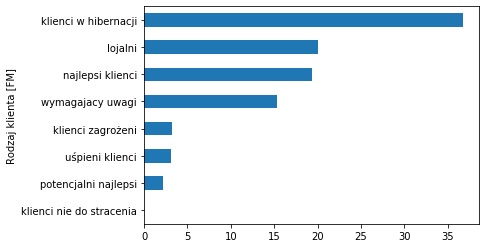

In [47]:
rodzaj_klienta = analiza_RFM.groupby(["Rodzaj klienta [FM]"])["Recency"].count()
rodzaj_klienta = rodzaj_klienta/rodzaj_klienta.sum()*100
rodzaj_klienta.sort_values().plot.barh(x='lab', y='val')


**Rys.8** Procentowy rozkład rodzajów klientów 


### 12.8 Jakie produkty kupowane są przez klientów? 

In [48]:
produkty1 = pd.merge(customer, orders, on="customerid")
produkty2 = pd.merge(produkty1, analiza_RFM, on="householdid")
produkty2 = produkty2[produkty2['orderdate'] <= "2016-01-01"]
produkty3 = pd.merge(produkty2, orderline, on="orderid")
produkty4 = pd.merge(produkty3, product, left_on="productid", right_on="PRODUCTID")

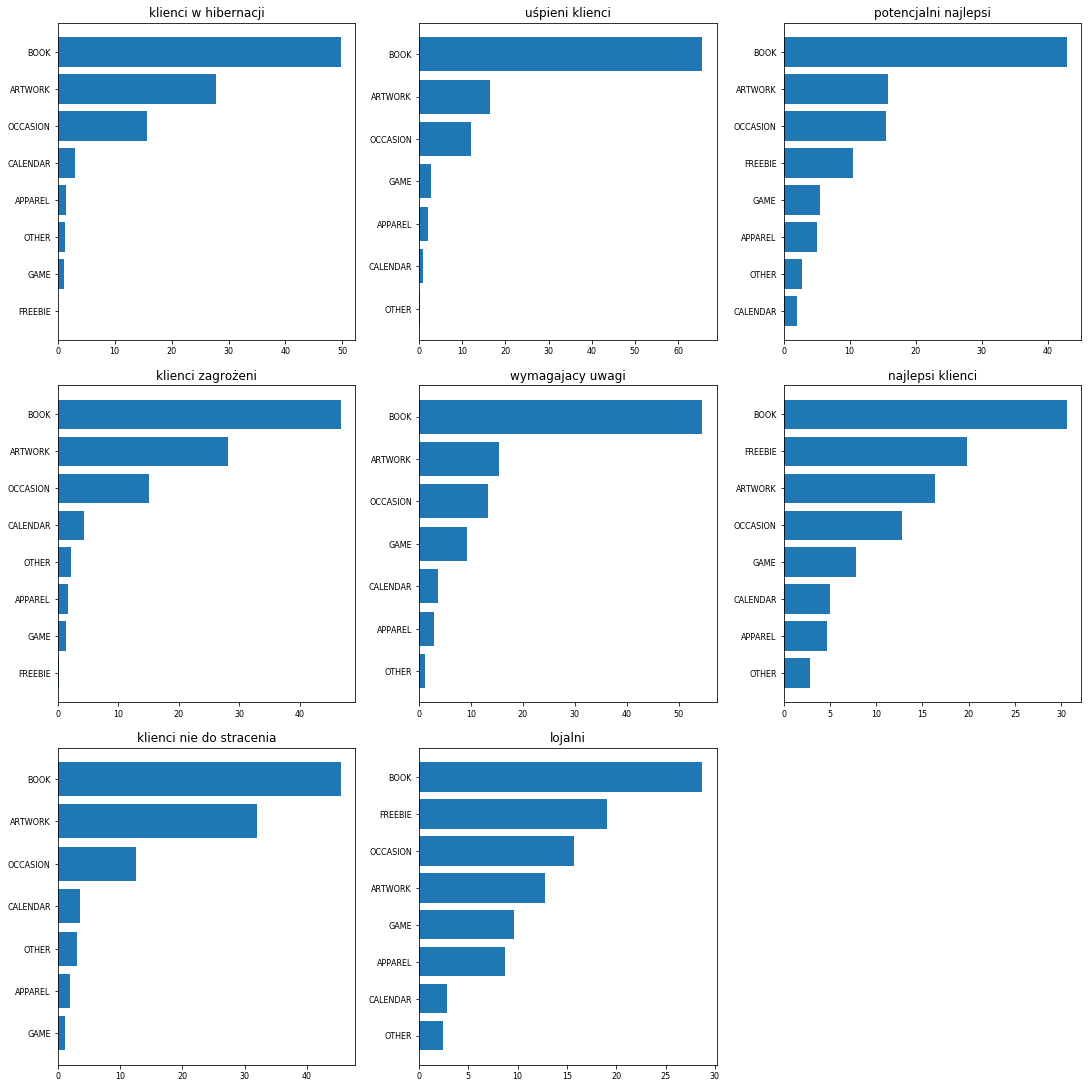

In [49]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
spec = fig.add_gridspec(ncols=3,nrows=3)
x_wykres = 0
y_wykres = 0 
for klient in rodzaj_klienta_mapa.values():
    produkty = produkty4[produkty4["Rodzaj klienta [FM]"]==klient].groupby("PRODUCTGROUPNAME")["customerid"].count().sort_values()
    if len(produkty)<=0:
        continue
    wykres_produkty = produkty/produkty.sum()*100
    ax=fig.add_subplot(spec[x_wykres,y_wykres])
    ax.barh(wykres_produkty.index, wykres_produkty.values)
    ax.tick_params(labelsize=8)
    ax.title.set_text(klient)
    x_wykres += 1
    if x_wykres >= 3:
        x_wykres = 0 
        y_wykres+=1

**Rys.9** Rozkład kupowanych grup artykułów przez każdą z grup klientów 



Na wykresach można zauważyć, że najczęściej kupowanymi artykułami są książki, sztuka oraz produkty z promocji ("*Occasion*") przez wszystkich klientów bez względu na ich rodzaj. Dodatkowo "najlepsi klienci", czyli następujące grupy: lojalni i najlepsi otrzymują gratisy. 

### 12.9 W jakim mieście klienci najczęściej kupują? 

In [50]:
klienci_miasto1 = pd.merge(customer, orders, on="customerid")
klienci_miasto2 = pd.merge(klienci_miasto1, analiza_RFM, on="householdid")
klienci_miasto2 = klienci_miasto2[klienci_miasto2['orderdate'] <= "2016-01-01"]
klienci_miasto_grupa = klienci_miasto2.groupby("city").count()["customerid"].sort_values()
klienci_miasto_grupa_lista = klienci_miasto_grupa.tail(15).index.tolist()

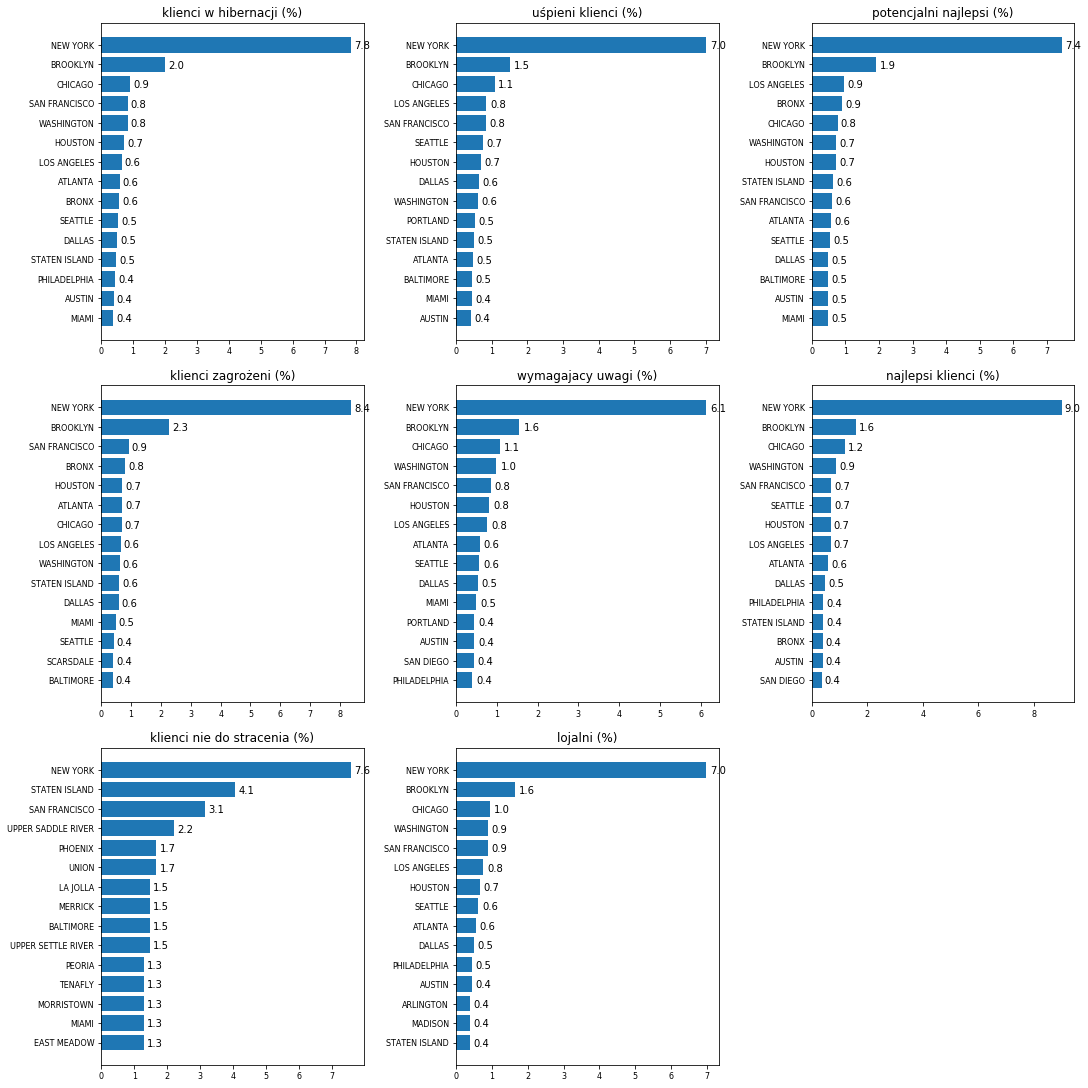

In [51]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
spec = fig.add_gridspec(ncols=3,nrows=3)
x_wykres = 0
y_wykres = 0 

for klient in rodzaj_klienta_mapa.values():
    klienci_miasto_grupa = klienci_miasto2[klienci_miasto2["Rodzaj klienta [FM]"]==klient].groupby("city").count()["customerid"].sort_values()
    if len(klienci_miasto_grupa)<=0:
        continue
    klienci_miasto_grupa_lista = klienci_miasto_grupa.tail(15).index.tolist()
    wartosci = klienci_miasto_grupa[klienci_miasto_grupa.index.isin(klienci_miasto_grupa_lista)]
    wartosci["OTHER*10"] = klienci_miasto_grupa[np.logical_not(klienci_miasto_grupa.isin(klienci_miasto_grupa_lista))].sum()
    wartosci = wartosci/wartosci.sum()*100
    new_wartosc_index = wartosci.index.tolist()[:-1]
    #new_wartosc_index.insert(0, wartosci.index.tolist()[-1])
    wartosci = wartosci.reindex(new_wartosc_index)
    ax=fig.add_subplot(spec[x_wykres,y_wykres])
    ax.barh(wartosci.index, wartosci.values)
    for i, v in enumerate(wartosci.values):
        ax.text(v+0.1, i-0.2, str(np.round(v,1)), color='black')
    ax.tick_params(labelsize=8)
    ax.title.set_text("{} (%)".format(klient))
    x_wykres += 1
    if x_wykres >= 3:
        x_wykres = 0 
        y_wykres+=1

**Rys.10** Rozkład procentowy miast ze względu na każdą z grup klientów 

Na wykresie można zauważyć, że najwięcej klientów znajduje się w Nowym Jorku, i stanowią oni ok. 7% w każdej grupie. Drugim miastem jest Brooklyn pod względem wszystkich klientów, a nasi klienci nie do stracenia znajdują się w Staten Island. Oznacza to, że przedsiębiorstwo powinno skupić się na tych klientach, jeżeli nie chcą, żeby zostali utraceni.


# 13. Migracje klientów w ramach komórek RFM -  poszczególne lata

In [52]:
def analiza_RFM_f(dane, is_plot = True):
    
    #R
    if is_plot:
        fig = plt.figure(constrained_layout=True, figsize=(15, 5))
        spec = fig.add_gridspec(ncols=3,nrows=1)
    
    grupowanie = dane.groupby(["householdid"])['orderdate'].max().to_frame()
    
    d0 =  grupowanie["orderdate"].max() #wzgledem ostatniego dnia zakupu przez klienta 
    liczba_dni = (d0 - grupowanie.orderdate)
    grupowanie['recency'] = liczba_dni.dt.days
    
    kwantyle = grupowanie['recency'].quantile(rzad_kwantyli)
    ustaw_poziomy(grupowanie,'recency',kwantyle)
    grupowanie["wartosc_r"] = grupowanie["wartosc"]
    
    if is_plot:
        ax1=fig.add_subplot(spec[0,0])
        kwantyle_wykres_ax(kwantyle,ax1,"RFM do początku {} Recency".format(max(dane["orderdate"].dt.year+1)))
    
    #F
    minimalna_data = dane.groupby(["householdid"])['orderdate'].min().to_frame()
    liczba_zamowien = dane.groupby(["householdid"])['orderdate'].count().to_frame()
    liczba_zamowien.columns = ["liczba_zamowien"]
    
    liczba_dni = (d0 - minimalna_data.orderdate)
    liczba_zamowien['liczba_dni_od_pierwszego_zakupu'] = liczba_dni.dt.days
    liczba_zamowien["frequency"] = liczba_zamowien['liczba_dni_od_pierwszego_zakupu']/liczba_zamowien['liczba_zamowien']
    
    kwantyle = liczba_zamowien['frequency'].quantile(rzad_kwantyli)
    ustaw_poziomy(liczba_zamowien,'frequency',kwantyle)
    liczba_zamowien["wartosc_f"] = liczba_zamowien["wartosc"]
    
    if is_plot:
        ax2=fig.add_subplot(spec[0,1])
        kwantyle_wykres_ax(kwantyle,ax2,"RFM do początku {} Frequency".format(max(dane["orderdate"].dt.year+1)))
    
    grupowanie = pd.merge(grupowanie, liczba_zamowien, on="householdid")
    
    #M
    kwota = dane.groupby(["householdid"])['totalprice'].mean().to_frame()
    kwota.columns= ["monetary"]
    kwantyle = kwota['monetary'].quantile(rzad_kwantyli)
    ustaw_poziomy(kwota,'monetary',monetary_kwantyle)
    kwota["wartosc_m"] = kwota["wartosc"]
    
    if is_plot:
        ax3=fig.add_subplot(spec[0,2])
        kwantyle_wykres_ax(kwantyle,ax3,"RFM do początku {} Monetary".format(max(dane["orderdate"].dt.year+1)))
    grupowanie = pd.merge(grupowanie, kwota, on="householdid")
    
    grupowanie["RFM"] = grupowanie["wartosc_r"]*100+grupowanie["wartosc_f"]*10+grupowanie["wartosc_m"]
    
    
    return grupowanie

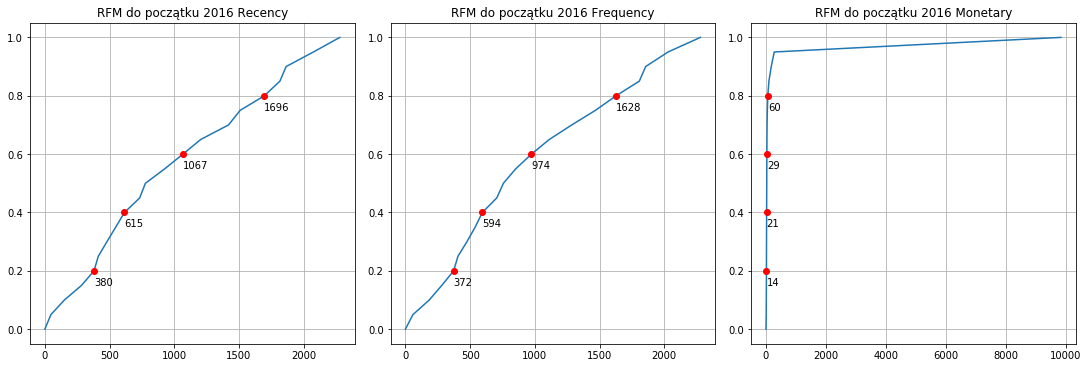

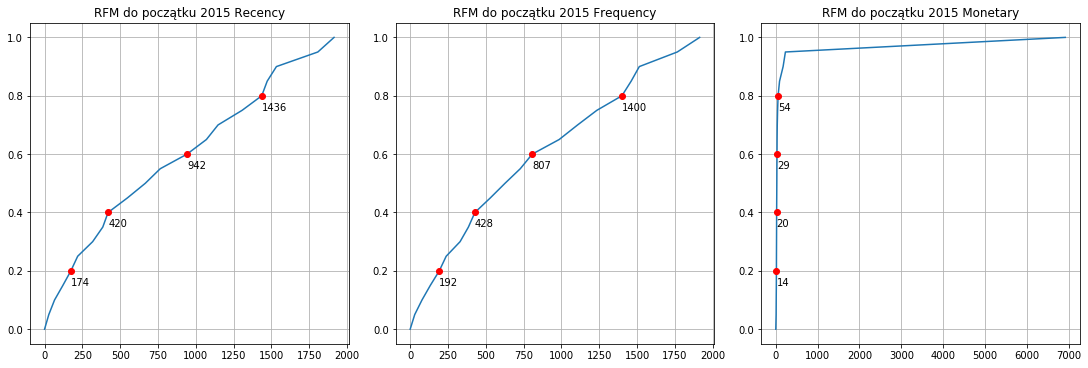

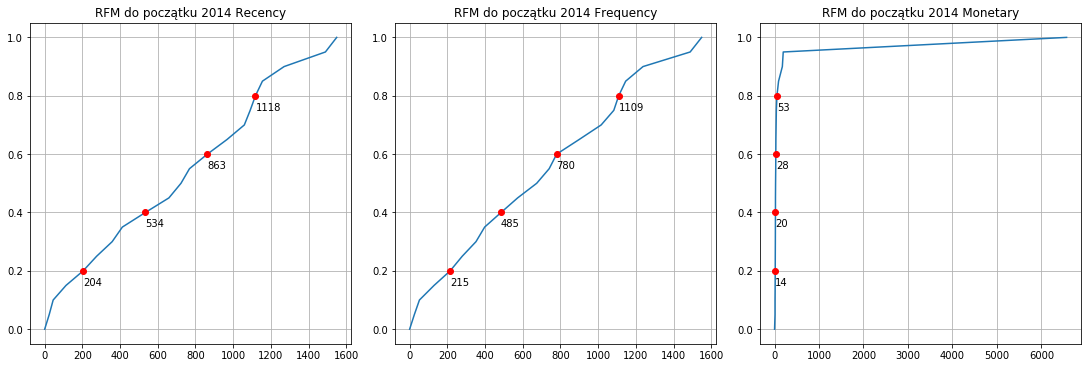

In [53]:
do_analizy = pd.merge(customer, orders, on="customerid")
r_2016 = analiza_RFM_f(do_analizy[do_analizy['orderdate'].dt.year < 2016])
r_2015 = analiza_RFM_f(do_analizy[do_analizy['orderdate'].dt.year < 2015])
r_2014 = analiza_RFM_f(do_analizy[do_analizy['orderdate'].dt.year < 2014])

**Rys.11** Wykresy z współczynnikami R,F i M dla lat 2014-2016


Na wykresie "Do 2015 roku" klienci najlepiej wypadli pod względem wskaźnika Recency, ponieważ 20% klientów dokonało ostatniego zakupu w ciągu ostatnich 174 dni. Najgorszą wartość izyskano na wykresie "Do roku 2016", ponieważ 20% klientów dokonało ostatniego zakupu w ciągu ostatnich 380 dni.     

Wskaźnik Frequency jest najlepszy do roku 2015, zaś najgorszy jest do roku 2016. 

Wskaźnik Monetary jest podobny w każdym z podanych lat. 






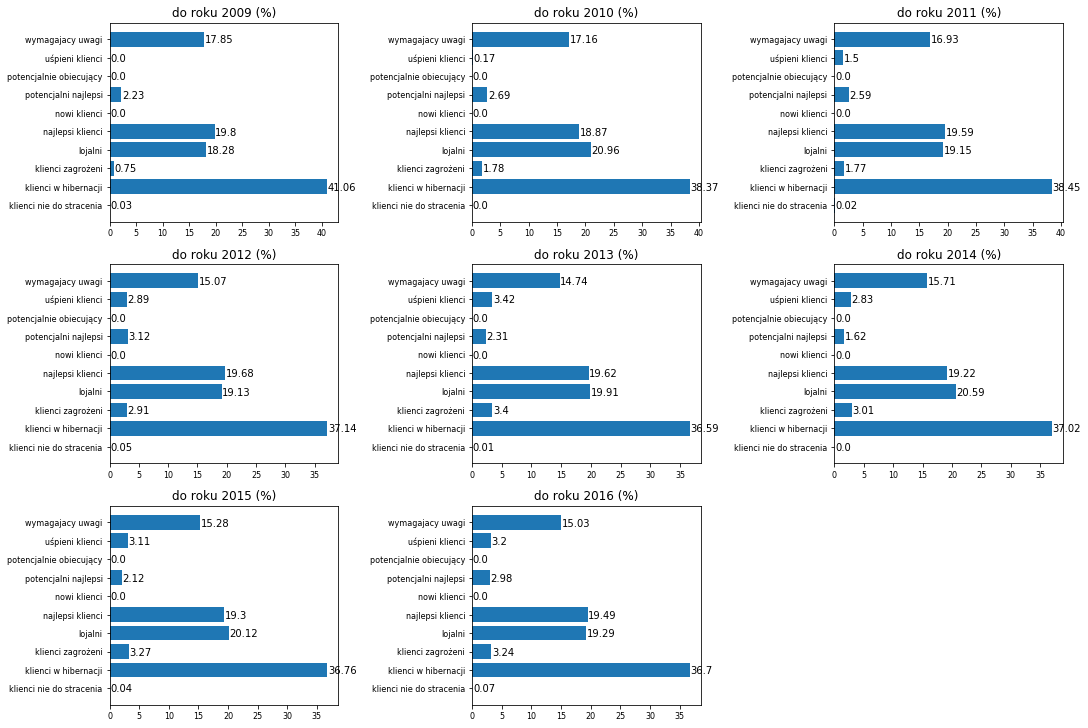

In [54]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
spec = fig.add_gridspec(ncols=3,nrows=3)
x_wykres = 0
y_wykres = 0 
for year in range(2009, 2017):
    rfm = analiza_RFM_f(do_analizy[do_analizy['orderdate'].dt.year < year+1], False)
    rfm['FM'] = rfm['wartosc_r'].map(str) + rfm['wartosc_f'].map(str)
    rfm['FM'] = rfm['FM'].replace(rodzaj_klienta_mapa, regex=True)
    rodzaj_klienta = rfm.groupby(['FM'])["wartosc_r"].count()
    rodzaj_klienta = rodzaj_klienta/rodzaj_klienta.sum()*100
    for typ_klienta in rodzaj_klienta_mapa.values():
        if typ_klienta not in rodzaj_klienta.index.tolist():
            rodzaj_klienta[typ_klienta] = 0
    new_index = rodzaj_klienta.index.tolist()
    new_index.sort()
    rodzaj_klienta = rodzaj_klienta.reindex(new_index)
    ax=fig.add_subplot(spec[x_wykres,y_wykres])
    ax.barh(rodzaj_klienta.index, rodzaj_klienta.values)
            
    for i, v in enumerate(rodzaj_klienta.values):
        ax.text(v+0.1, i-0.2, str(np.round(v,2)), color='black')
    ax.tick_params(labelsize=8)
    ax.title.set_text("do roku {} (%)".format(year))
    y_wykres += 1
    if y_wykres >= 3:
        y_wykres = 0 
        x_wykres+=1

**Rys.12** Rozkład klientów z podziałem na lata

Na wykresach powyżej największy odsetek stanowią klienci w hibernacji, czyli jest to najgorszy wariant - kupowali bardzo dawno i bardzo rzadko. Klienci wymagający uwagi utrzymują się na podobnym poziomie, jednakże widać ich niewielką stratę. Najlepsi klienci utrzymują się na stałym poziomie. 

Liczba klientów uśpionych wzrasta. Odsetek potencjalnie najlepszych klientów zmienia się względem lat, nie jest stały (rośnie i maleje). Liczba klientów zagrożonych wzrasta. 



Klienci do nie stracenia są małym odsetkiem.

Liczba nowych klientów wynosi 0 ze względu na to, że nie został spełniony warunek dla: R (wartość 1), F (wartość 5). Wynika to z faktu że wskaźnik Frequency nie był liczony od początku daty analizy dla każdego klienta, tylko od dnia pierwszego zakupy przez dane gospodarstwo domowe.

# 14. Wnioski z analizy RFM 

Podsumowując do 01 stycznia 2016 roku: 
 
**1. Wskaźnik recency wskazał, że mała liczba gospodarstw zrobiła ostatnio zakupy.**
    - 20% gospodarstw dokonało zakupu w ciągu 381 dni
    - 40% gospodarstw dokonało zakupu w ciągu 615 dni
    - 60% gospodarstw dokonało zakupu w ciągu  1068 dni
    - 80% gospodarstw dokonało zakupu w ciągu  1697 dni
**. Wskaźnik frequency wskazał, że klienci rzadko kupowali produkty.**
    - 20% gospodarstw zamawia minimalnie raz w ciągu 373 dni
    - 40% gospodarstw zamawia minimalnie w ciągu 595 dni
    - 60% gospodarstw zamawia minimalnie w ciągu  975 dni
    - 80% gospodarstw zamawia minimalnie w ciągu  1629 dni
**3. Wskaźnik monetary wskazał, że klienci średnio wydają mało pieniędzy.** 
    - 20% gospodarstw wydaje średnio na zakupy 14 dolarów 
    - 40% gospodarstw wydaje średnio na zakupy 21 dolarów
    - 60% gospodarstw wydaje średnio na zakupy 29 dolarów
    - 80% gospodarstw wydaje średnio na zakupy 60 dolarów
**4. Z wykresu bąbelkowego (rys. 4)** zauważono, że największa korelacja występuje pomiędzy wartościami identycznymi dla R i F, czyli takimi jak: 11, 22, 33, 44, 55.            
**5. Ocena gospodarstw według punktacji (rys. 5)** pozwoliła na odkrycie podobieństwa pomiędzy wartościami granicznymi. Wysokości słupków są niemal podobne.  Oznacza to, że oceny najbardziej pozytywne i najbardziej negatywne zostały uzyskane przez podobną liczbę klientów.               
**6. Największy zysk przynoszą klienci**, którzy uzyskali najbardziej pozytywną ocenę w analizie RFM (rys. 6)          
**7. Analiza wykazała, że największy odsetek klientów** to klienci w hibernacji. Na drugim miejscu są klienci: lojalni, najlepsi i wymagający uwagi.    
**8. Najczęstsze produkty kupowane przez wszystkich klientów to:**  książki, sztuka oraz produkty z promocji ("Occasion"). Dodatkowo "najlepsi klienci", czyli następujące grupy: lojalni i najlepsi otrzymują gratisy.            
**9. Po zaklasyfikowaniu klientów widać, że:** najwięcej klientów znajduje się w Nowym Jorku, i stanowią oni ok. 7% dla każdej z grup.   


**Porównując lata 2014-2016**: 
* Do 2015 roku klienci najlepiej wypadli pod względem wskaźnika Recency, ponieważ 20% klientów dokonało ostatniego zakupu w ciągu ostatnich 174 dni, zaś wartość ta na wykresie do roku 2016 jest najgorsza, ponieważ 20% klientów dokonało ostatniego zakupu w ciągu ostatnich 380 dni.

* Wskaźnik Frequency jest najlepszy do roku 2015, zaś najgorszy jest do roku 2016.

* Wskaźnik Monetary jest podobny w każdym z podanych lat.

**Na wykresie (Rys.12)** widoczne są migracje klientów, które pokazują, że liczba klientów uśpionych wzrasta. Odsetek potencjalnie najlepszych klientów zmienia się względem lat, nie jest stały (rośnie i maleje). Liczba klientów zagrożonych wzrasta.

    





